In [1]:
import yfinance as yf
import numpy as np

In [2]:
df=yf.download(['AAPL','CAT','TSLA'],start='2000-12-01',end='2020-12-01')
df

[*********************100%***********************]  3 of 3 completed


Adj Close                               Close              \
                  AAPL         CAT        TSLA        AAPL         CAT   
Date                                                                     
2000-11-30    0.251575   11.156616         NaN    0.294643   19.656250   
2000-12-01    0.260152   11.546829         NaN    0.304688   20.343750   
2000-12-04    0.254434   12.291787         NaN    0.297991   21.656250   
2000-12-05    0.259199   12.309517         NaN    0.303571   21.687500   
2000-12-06    0.218222   11.795146         NaN    0.255580   20.781250   
...                ...         ...         ...         ...         ...   
2020-11-23  112.686134  168.390808  173.949997  113.849998  174.779999   
2020-11-24  113.992645  170.433289  185.126663  115.169998  176.899994   
2020-11-25  114.843842  168.246277  191.333328  116.029999  174.630005   
2020-11-27  115.398132  168.679825  195.253326  116.589996  175.080002   
2020-11-30  117.832985  167.244278  189.199997  119.050003  173.589996   

                              High                                 Low  \
                  TSLA        AAPL         CAT        TSLA        AAPL   
Date                                                                     
2000-11-30         NaN    0.303571   20.531250         NaN    0.287946   
2000-12-01         NaN    0.312500   20.625000         NaN    0.300223   
2000-12-04         NaN    0.306920   21.968750         NaN    0.293527   
2000-12-05         NaN    0.311384   22.125000         NaN    0.292411   
2000-12-06         NaN    0.267857   21.343750         NaN    0.250000   
...                ...         ...         ...         ...         ...   
2020-11-23  173.949997  117.620003  175.500000  175.333328  113.750000   
2020-11-24  185.126663  115.849998  178.320007  186.663330  112.589996   
2020-11-25  191.333328  116.750000  176.479996  191.333328  115.169998   
2020-11-27  195.253326  117.489998  175.919998  199.593338  116.220001   
2020-11-30  189.199997  120.970001  174.880005  202.600006  116.809998   

                                          Open                          \
                   CAT        TSLA        AAPL         CAT        TSLA   
Date                                                                     
2000-11-30   19.625000         NaN    0.297991   20.062500         NaN   
2000-12-01   19.750000         NaN    0.303571   19.750000         NaN   
2000-12-04   20.375000         NaN    0.306920   20.375000         NaN   
2000-12-05   20.968750         NaN    0.302455   21.656250         NaN   
2000-12-06   20.687500         NaN    0.261161   21.343750         NaN   
...                ...         ...         ...         ...         ...   
2020-11-23  173.240005  167.263336  117.180000  173.759995  167.833328   
2020-11-24  175.270004  175.399994  113.910004  176.250000  180.133331   
2020-11-25  172.779999  181.789993  115.550003  176.460007  183.353333   
2020-11-27  173.880005  192.816666  116.570000  174.410004  193.720001   
2020-11-30  172.429993  184.836670  116.970001  173.610001  200.736664   

                Volume                        
                  AAPL      CAT         TSLA  
Date                                          
2000-11-30   809597600  3984400          NaN  
2000-12-01   385705600  3003600          NaN  
2000-12-04   371520800  6023200          NaN  
2000-12-05   613978400  5893000          NaN  
2000-12-06  1374464000  3086800          NaN  
...                ...      ...          ...  
2020-11-23   127959300  2403500  150780912.0  
2020-11-24   113874200  3447000  160945482.0  
2020-11-25    76499200  2506400  146790486.0  
2020-11-27    46691300   976900  112683234.0  
2020-11-30   169410200  2382600  189009156.0  

[5031 rows x 18 columns]

In [3]:
df=np.log(1+df['Adj Close'].pct_change())
df

,AAPL,CAT,TSLA
Date,,,
2000-11-30,NaN,NaN,NaN
2000-12-01,0.033524,0.034378,NaN
2000-12-04,-0.022225,0.062520,NaN
2000-12-05,0.018552,0.001441,NaN
2000-12-06,-0.172080,-0.042685,NaN
...,...,...,...
2020-11-23,-0.030194,0.014697,0.063771
2020-11-24,0.011528,0.012056,0.062272
2020-11-25,0.007439,-0.012915,0.032977


In [4]:
#Portfolio return=w1*ui+w2*ui
weights=[0.25,0.25,0.25]
weights[0]*df.AAPL.mean()+weights[1]*df.CAT.mean()

0.00044019399395016227

In [5]:
df.mean()

AAPL    0.001223
CAT     0.000538
TSLA    0.001821
dtype: float64

In [6]:
np.dot(df.mean(),weights)

0.000895357416210574

In [7]:
def portfolioreturn(weights):
    return np.dot(df.mean(),weights)*252

In [8]:
portfolioreturn(weights)

0.22563006888506465

In [9]:
#Portfoliovariance
#w1**2*sigma1**2+w2**2*sigma2**2+2*w1*w2*Cov12

In [10]:
df.cov()

,AAPL,CAT,TSLA
AAPL,0.000544,0.000193,0.000195
CAT,0.000193,0.000410,0.000161
TSLA,0.000195,0.000161,0.001247


In [11]:
pv=weights[0]**2*df.cov().iloc[0,0]+weights[1]**2*df.cov().iloc[1,1]+2*weights[0]*weights[1]*df.cov().iloc[0,1]

In [12]:
pv

8.378661003620577e-05

In [13]:
#Portfolio standard deviation 
#square root of portfoliovariance 
pv**(1/2)*np.sqrt(250)

0.1447295840837368

In [14]:
(np.dot(np.dot(df.cov(),weights),weights))**(1/2)*np.sqrt(250)

0.22705842593162

In [15]:
def portfoliostd(weights):
    return (np.dot(np.dot(df.cov(),weights),weights))**(1/2)*np.sqrt(250)

In [16]:
portfoliostd(weights)

0.22705842593162

In [17]:
def weightscreator(df):
    rand=np.random.random(len(df.columns))
    rand/=rand.sum()#sum for random weight has to be 1
    return rand

In [18]:
weightscreator(df)

array([0.07107876, 0.49135993, 0.43756132])

In [19]:
import matplotlib.pyplot as plt

In [20]:
w=[]
returns=[]
std=[]
for i in range(500):
    m=weightscreator(df)
    w.append(m)
    returns.append(portfolioreturn(m))
    std.append(portfoliostd(m))


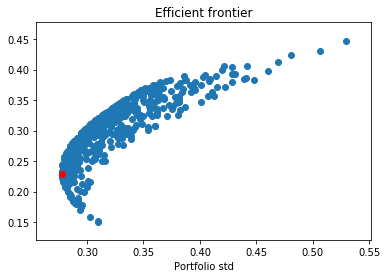

In [28]:
plt.scatter(std,returns)
plt.scatter(0.2776149613637795,0.22841677098114,color='red')
plt.title('Efficient frontier')
plt.xlabel("Portfolio std")
plt.show()

In [22]:
min(std)

0.2777618262250909

In [23]:
std.index(min(std))

326

In [24]:
returns[std.index(min(std))]

0.22841677098114

In [25]:
e=w[std.index(min(std))]

In [26]:
portfolioreturn(e)

0.22841677098114